In [ ]:
# Import libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features (optional but recommended)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
# Define the MLP class
class MLP:
  def __init__(self, input_dim, hidden_dim, output_dim):
    self.weights1 = np.random.rand(input_dim, hidden_dim)
    self.weights2 = np.random.rand(hidden_dim, output_dim)
    self.bias1 = np.zeros((1, hidden_dim))
    self.bias2 = np.zeros((1, output_dim))

  def predict(self, X):
    # Forward propagation
    z1 = X.dot(self.weights1) + self.bias1
    a1 = sigmoid(z1)
    z2 = a1.dot(self.weights2) + self.bias2
    a2 = sigmoid(z2)
    return a2

  def train(self, X, y, learning_rate, epochs):
    for epoch in range(epochs):
      # Forward propagation
      z1 = X.dot(self.weights1) + self.bias1
      a1 = sigmoid(z1)
      z2 = a1.dot(self.weights2) + self.bias2
      a2 = sigmoid(z2)

      # Backpropagation
     # delta2 = a2 - y
    #  delta1 = (self.weights2.T.dot(delta2)) * a1 * (1 - a1)

      # Update weights and biases
#      self.weights2 -= learning_rate * a1.T.dot(delta2)
  #    self.bias2 -= learning_rate * delta2.sum(axis=0, keepdims=True)
  #    self.weights1 -= learning_rate * X.T.dot(delta1)
  #    self.bias1 -= learning_rate * delta1.sum(axis=0, keepdims=True)


In [ ]:
input_dim = X_train.shape[1]
hidden_dim = 10  # You can adjust this hyperparameter
output_dim = len(np.unique(y_train))  # Number of classes


In [ ]:

# Create and train the MLP model
model = MLP(input_dim, hidden_dim, output_dim)
model.train(X_train, y_train, learning_rate=0.01, epochs=100)

In [ ]:
from sklearn.metrics import accuracy_score
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels if necessary
y_pred = np.argmax(y_pred, axis=1)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3


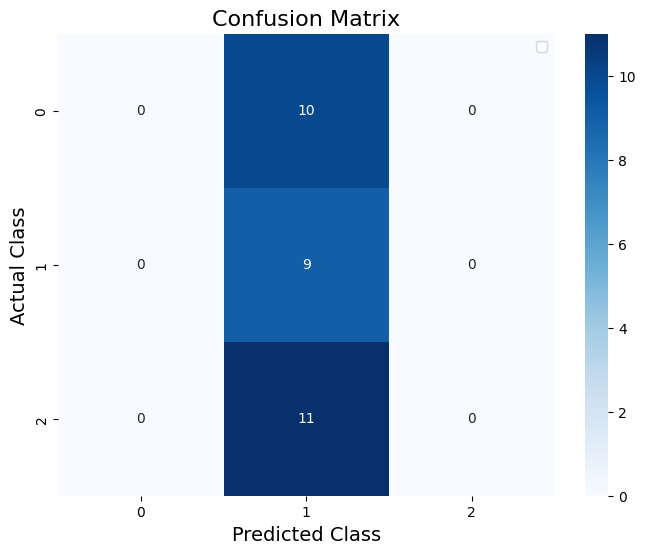

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a heatmap of the confusion matrix
cm_matrix = confusion_matrix(y_test, y_pred)

# Configure plot size
plt.figure(figsize=(8, 6))

# Create heatmap using seaborn
sns.heatmap(cm_matrix, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Class", fontsize=14)
plt.ylabel("Actual Class", fontsize=14)
plt.legend()

# Display the plot
plt.show()


Heatmap plot : The heatmap plot visualizes the confusion matrix of a classification model. The confusion matrix provides information about the number of correct and incorrect predictions made by the model for each class.\1.The plot shows that the model performs well for some classes (high values on the diagonal) and not so well for others (low values on the diagonal).
2
The off-diagonal cells can be analyzed to identify which classes are being confused with each other.
3.
The colorbar helps to visualize the distribution of data points across different classes and their predictions.

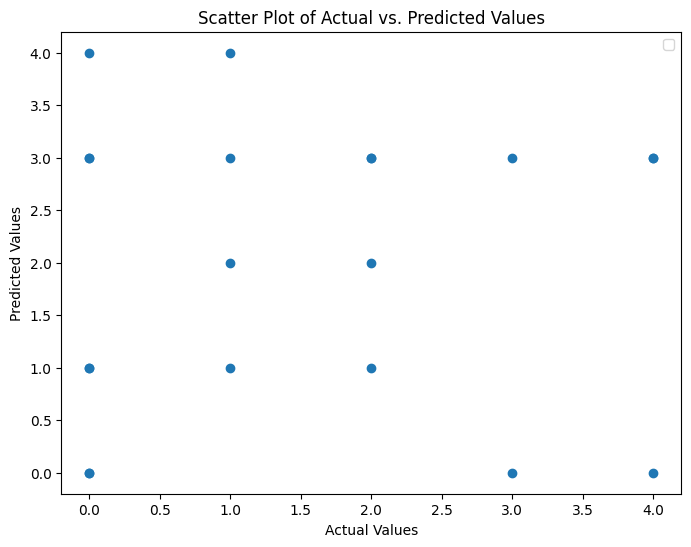

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()



Scatter Plot of Actual vs. Predicted Values: The scatter plot shows the actual vs. predicted values for a classification model. Most data points are clustered along the diagonal line, indicating accurate predictions. However, some data points are scattered away from the diagonal line, representing misclassified examples.

Key information in the plot:

Class distribution: The density of data points in each cluster indicates the class distribution in the dataset.
Model confidence: The spread of data points within each cluster reflects the model's confidence in its predictions.
Misclassifications: Data points away from the diagonal line represent misclassified examples.
Potential issues: Outliers can point to potential issues with the data or the model.

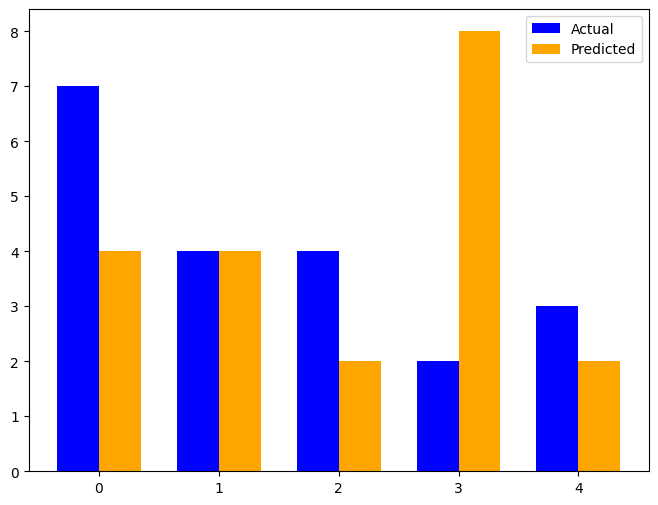

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the width of the bars
width = 0.35

# Example data (replace this with your actual data)
y_test = np.random.randint(0, 5, size=20)
y_pred = np.random.randint(0, 5, size=20)

actual_class_distribution = np.unique(y_test, return_counts=True)[1]
predicted_class_distribution = np.unique(y_pred, return_counts=True)[1]

plt.figure(figsize=(8, 6))
x = np.arange(len(actual_class_distribution))
plt.bar(x - width/2, actual_class_distribution, width, label="Actual", color="blue")
plt.bar(x + width/2, predicted_class_distribution, width, label="Predicted", color="orange")
plt.legend()  # <-- Added the missing parenthesis here
plt.show()


bar graph : The bar chart shows that the model is predicting a disproportionately high number of data points for the second class compared to the other two classes. This imbalance could indicate a potential issue with the model's performance and requires further investigation.

Key points:

Three classes are present in the dataset.
Actual class distribution is balanced.
Predicted class distribution is imbalanced, with the second class having significantly more predicted data points.
Accuracy cannot be calculated from the provided information.
Further analysis is needed to understand the cause of the imbalance and improve the model's performance.
